<h4><b>Dataset name / short description:</b></h4>

The planets dataset from Seaborn is a collection of data about planets beyond our Solar System, known as exoplanets. The dataset contains information on 1,039 exoplanets, including their discovery method, orbital period, mass, and distance from Earth.

Here are the columns in the planets dataset:

method: the method used to discover the planet, such as radial velocity, transit, or imaging.
number: the number of planets discovered using that method.
orbital_period: the time it takes for the planet to orbit its host star, in days.
mass: the mass of the planet relative to Jupiter.
distance: the distance from Earth to the planet's host star, in light-years.
year: the year the planet was discovered.

<h4><b>Data source (url):</b></h4>
Seaborn library

<h4><b>Data format:</b></h4>
Dataset in the Pandas DataFrame

<h4><b>Data description and limitations:</b></h4>
Not all discoverign methods are mentioned in the dataset. There could be other exoplanets which are not mentioned in the dataset becuase of a different discovery method. Another limitation that dataset is current as of 2014. Since the dataset has not been updated in nine years, it may not include more recent exoplanet discoveries.

<h4><b>The question related to the dataset:</b></h4>
How history of discovering exoplanets changed over time?

<h4><b>Code:</b></h4>

In [157]:
# import modules
import numpy as np
import pandas as pd
import seaborn as sns

In [158]:
# I decided to make an analysis of seaborn datasets
# firstly, I need to get names of all datasets
# to choose the mosr interesting for me
sns.get_dataset_names()

# I googled that 
# "fmri" - contains information about brain activity measured using functional magnetic resonance imaging (fMRI).
# "planets" - contains information about planets discovered outside of our solar system.
# both of them are interesting for me
# I will take "planets" dataset

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [159]:
# load the dataset
# firstly, we can see the the structure of the df
df = sns.load_dataset("planets")
df.info()

# there are 6 columns, that containt string, float and int formats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [160]:
# see the the columns and rows structure
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [161]:
# we can see that ther are a lof of Nan values in the column "mass"
# I wanted to delete them
# df = df.dropna()
# but if we delete, we lose 537 rows
# I decided to keep them

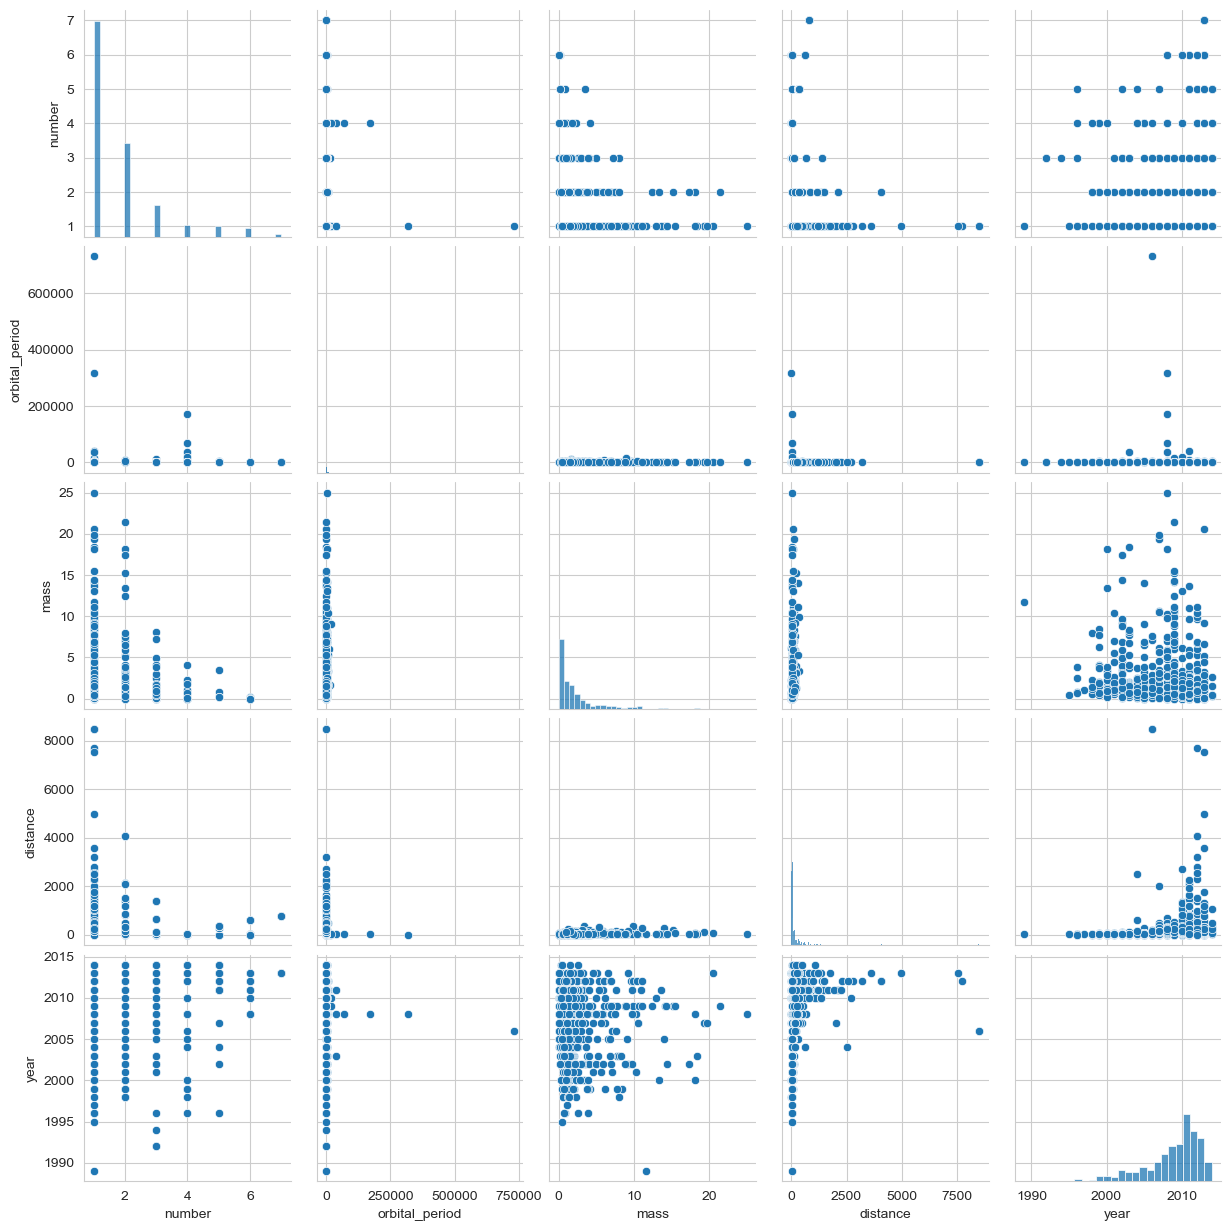

In [162]:
# we can start with playing around and see do we have any correlation
# joint plot
sns.pairplot(df)

# we do not see any correlation

In [163]:
# I decided to make also a table of correlations
# maybe it could help to find anything interesting
correlations = df.corr(numeric_only=True)
correlations

# we do not see any strong correlation

,number,orbital_period,mass,distance,year
number,1.000000,-0.012570,-0.241429,-0.033638,0.147849
orbital_period,-0.012570,1.000000,0.173725,-0.034365,-0.032333
mass,-0.241429,0.173725,1.000000,0.274082,-0.123787
distance,-0.033638,-0.034365,0.274082,1.000000,0.178922
year,0.147849,-0.032333,-0.123787,0.178922,1.000000


In [164]:
# we can see what was the most popular method to discover a planet
df["method"].value_counts()

# there are two as the most popular methods: Radial Velocity and Transit

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

<Axes: xlabel='year', ylabel='number'>

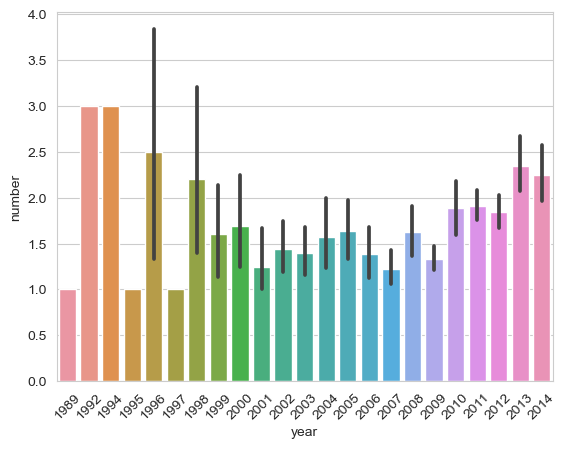

In [165]:
# bar plot
plt.xticks(rotation=45)
sns.barplot(x='year',y='number',data=df)

# here we can see that the number of dicovering exoplanets changed during years
# I did not understand what these black lines mean 
# and decided to make to use Pandas to check the years
# with the biggest amount of discovers

In [166]:
# all years where number of discovery exoplanets 
# more than 6
year = df[df['number'] > 6]
year

# we can see that there is only one year 2013
# I tried to find what special was in 2013 year
# maybe some new equipments were developed, but there is nothing special

,method,number,orbital_period,mass,distance,year
818,Transit,7,7.008151,NaN,780.0,2013
819,Transit,7,8.719375,NaN,780.0,2013
820,Transit,7,59.736670,NaN,780.0,2013
821,Transit,7,91.939130,NaN,780.0,2013
822,Transit,7,124.914400,NaN,780.0,2013
823,Transit,7,210.606970,NaN,780.0,2013
824,Transit,7,331.600590,NaN,780.0,2013


<Axes: xlabel='year', ylabel='number'>

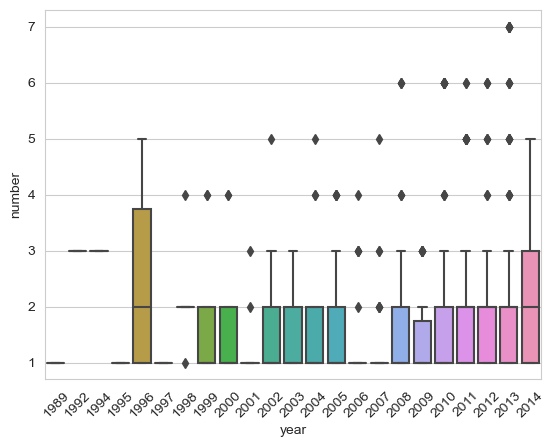

In [167]:
# I decided to use another plot to see the data clearer
plt.xticks(rotation=45)
sns.boxplot(x='year', y='number', data=df)

# we can see that pick years were 2008 - 2013 except 2009
# I googled about these years:
# Between 1992 and 2000, just over 30 exoplanets were discovered. 
# And by 2009, that number only increased to roughly 400. 
# But in 2009, NASA’s Kepler Space Telescope launched. It was designed specifically 
# to detect exoplanets in one small patch of the sky using the transit method 
# and data collected in its 9 years of operation has confirmed the existence 
# of around 2,400 of the exoplanets that we know of today.
# source: https://spacecentre.co.uk/blog-post/30-years-discovering-exoplanets/#:~:text=The%20hunt%20for%20exoplanets%20started,only%20increased%20to%20roughly%20400.

# This is also proved our analytics earlier, that one of the most
# popular methods was Transit

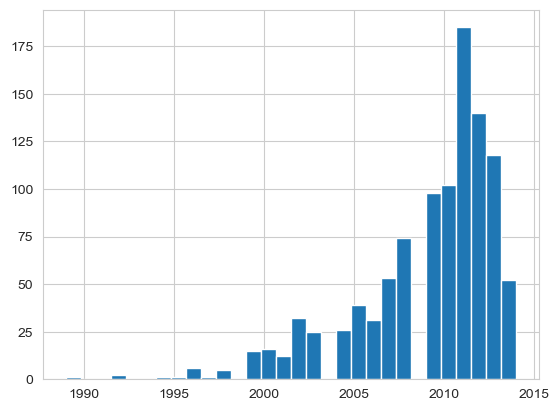

In [168]:
# we also can use plot to show groups of discoveries
# we use plot with bins, the data will be divided into a set of equally spaced bins
plt.hist(planets['year'], bins=30)
plt.show()

# here we can prove our earlier analysis that 2008 - 2013 years
# were the most succesfull in our dataset

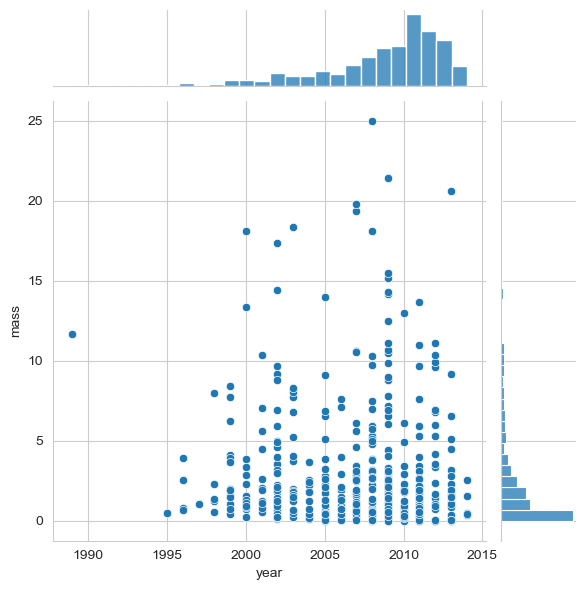

In [169]:
# we can create a joint plot to see the trends of mass
sns.jointplot(x='year', y='mass', data=df)

# I was thinking maybe it is more difficult to find bigger planets
# that's why they were discovered later
# I googled that "it is much easier to detect planets that 
# are larger because they block more of the light from the star.
# source: https://astro.nmsu.edu/organizations/agso/XoplanetLab.pdf

# To find these bigger exoplanets scientists use Doppler method
# but Doppler and Radial Velocity methods are the same
# source: https://www.nasa.gov/kepler/overview/planetdetectionmethods/#:~:text=Doppler%20spectroscopy%20is%20used%20to,as%20the%20radial%20velocity%20method.)

# This is also proved our analytics earlier, that 
# second popular methods was Radial Velocity

<Axes: xlabel='method', ylabel='year'>

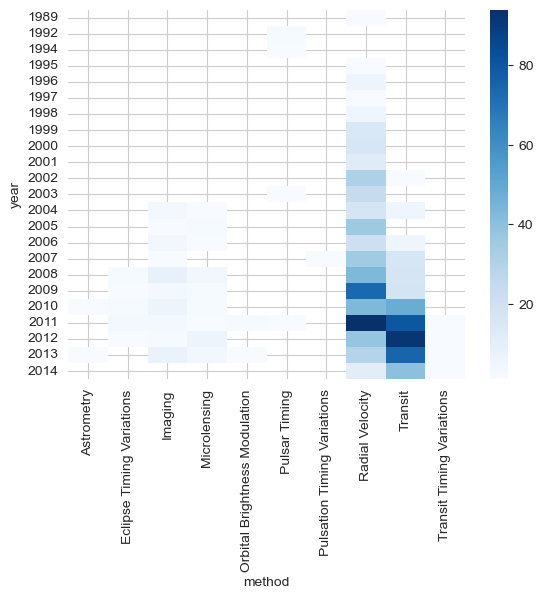

In [170]:
# we can create a heatmap of years and discovery method
# original colours did not work correctly that's why I used pallete
sns.heatmap(discoveries_by_method, cmap="Blues")

# we can see that there were some methods Imaging and Microlensing
# that were popular before 2004 year
# Imaging method is not actual because "The major problem astronomers face in 
# trying to directly image exoplanets is that the stars they orbit are millions 
#of times brighter than their planets
# source: https://exoplanets.nasa.gov/news/1605/observing-exoplanets-what-can-we-really-see/#:~:text=The%20major%20problem%20astronomers%20face,coming%20from%20its%20host%20star.

# There is also an issue with Microlensing method that 
# "any planets detected using this method will not be observable again"
# source: https://www.universetoday.com/138141/gravitational-microlensing-method/#:~:text=Disadvantages%3A,follow%2Dup%20investigations%20virtually%20impossible.

# It explains a lot the reasons of stopind using these methods

# And we also can finds evidences why Radial Velocity method is the most succesful
# because "it is ideal for ground-based telescopes because (unlike for 
# transit photometry) stars do not need to be monitored continuously.
# source: https://www.planetary.org/articles/color-shifting-stars-the-radial-velocity-method#:~:text=Radial%20velocity%20was%20the%20first,need%20to%20be%20monitored%20continuously.

# Also, Transit method is succesfull becuase "it can provide accurate 
# constraints on the size of detected planets."
# source: https://www.universetoday.com/137480/what-is-the-transit-method/#:~:text=Advantages%3A,a%20result%20of%20a%20transit.

/var/folders/lj/tcwl5glj0blfftjn4df0129r0000gn/T/ipykernel_4569/3585359739.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="mass", y="orbital_period", data=df, cmap="Blues", shade=True)


<Axes: xlabel='mass', ylabel='orbital_period'>

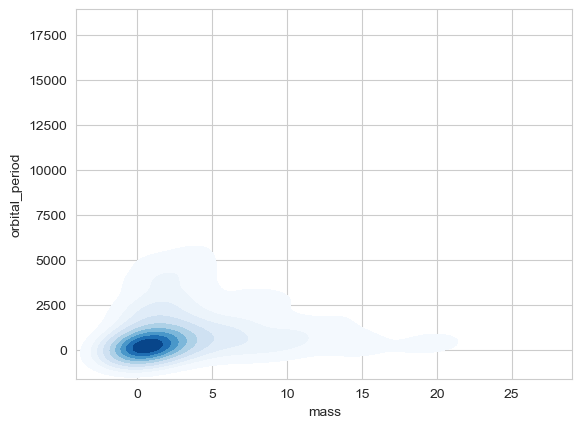

In [171]:
# we can create a 2D density plot
sns.kdeplot(x="mass", y="orbital_period", data=df, cmap="Blues", shade=True)

# we can see that most exoplanets have a mass less than 5 Jupiter masses 
# and an orbital period less than 1000 days
# for better understaning, orbital period of Earth is 365 days
# but some of the exoplanets are the same sizes as the Earth planet

# also for better understanding, "Jupiter mass is a common unit of mass 
# in astronomy that is used to indicate the masses of other similarly-sized objects
# source: https://en.wikipedia.org/wiki/Jupiter_mass#:~:text=Jupiter%20mass%20is%20a%20common,a%20convenient%20scale%20for%20comparison

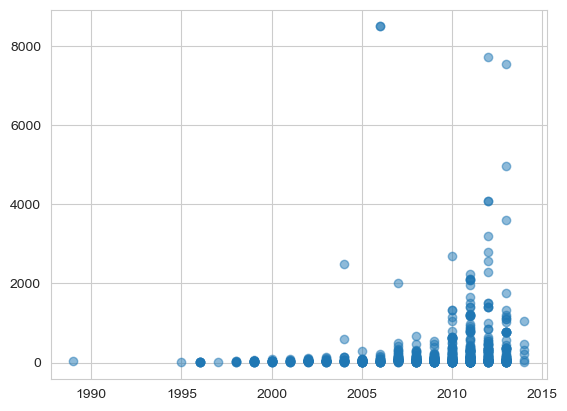

In [172]:
# we can create a scatter plot of year vs distance
plt.scatter(df['year'], df['distance'], alpha=0.5)

# here we can see that exoplanets which are closer to the Earth
# were discovered earlier that exoplanets which are far away
# becuase "exoplanets, which orbit distant stars, are more difficult 
# to directly observe, because they are much farther away and close 
# to their extremely bright stars"
# source: https://www.asc-csa.gc.ca/eng/astronomy/beyond-our-solar-system/detecting-exoplanets.asp#:~:text=Researchers%20are%20able%20to%20take,to%20their%20extremely%20bright%20stars.

<h4><b>Suggestions for improving data:</b></h4>

1. I would add atmosperic data to the dataset. It would help for more detailed analysis of the exoplanet composition and habitability
2. Also, I would add the data about the host star (size, age, and composition). It would help to understand on how the properties of the host star affect the formation and evolution of exoplanets.
3. Besides, to add the new information about observations and discovers